<a href="https://colab.research.google.com/github/Reape4er/neural_network/blob/main/%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B8%20%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Использование предобученной модели

### 1.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights=ввввввввввввв'imagenet')


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 1.2. Загрузите из сети Интернет 5 изображений с разными классами, из тех, что приведены в [списке](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), и сохраните их представление в список images

In [ ]:
from pathlib import Path
import cv2 as cv
class_names = [0, 8, 11, 42, 36]

from pathlib import Path

# Получаем список всех файлов с расширением .jpg в текущей директории
jpg_files = Path('.').glob('*.jpg')

# Извлекаем названия файлов без расширения (используем .stem)
class_names = [file.stem for file in jpg_files]
# Получаем список всех файлов с расширением .jpg в текущей директории
jpg_files = Path('.').glob('*.jpg')
# Если нужно сохранить полные пути к файлам как строки
jpg_files = [str(file) for file in jpg_files]

print("Файлы:", jpg_files)
print("Названия классов:", class_names)

Файлы: ['Carduelis.jpg', 'hen.jpg', 'TincaTincaTarmoRaadik.jpg', 'agama-op-1.jpg', 'terrapin.jpg']
Названия классов: ['Carduelis', 'hen', 'TincaTincaTarmoRaadik', 'agama-op-1', 'terrapin']


### 1.3. Напишите функцию, принимающую на вход список с исходными изображениями и возвращающую список с преобразованными изображениями под формат входных данных выбранной Вами модели СНС (нормализация).

(Не забудьте создать независимую копию исходного списка в теле функции, для обработки именно независимой копии, а не оригинального списка)

In [ ]:
def normalize(images, shape):
  proc_images = np.array(images)
  proc_images = cv2.resize(proc_images, (shape[0], shape[1]))
  proc_images = proc_images.reshape(-1, shape[0], shape[1], shape[2])
  proc_images = proc_images.astype('float') / 255.0

  return proc_images


### 1.5. Выведите изображения и соответствующие им классы (как в примере из теории)

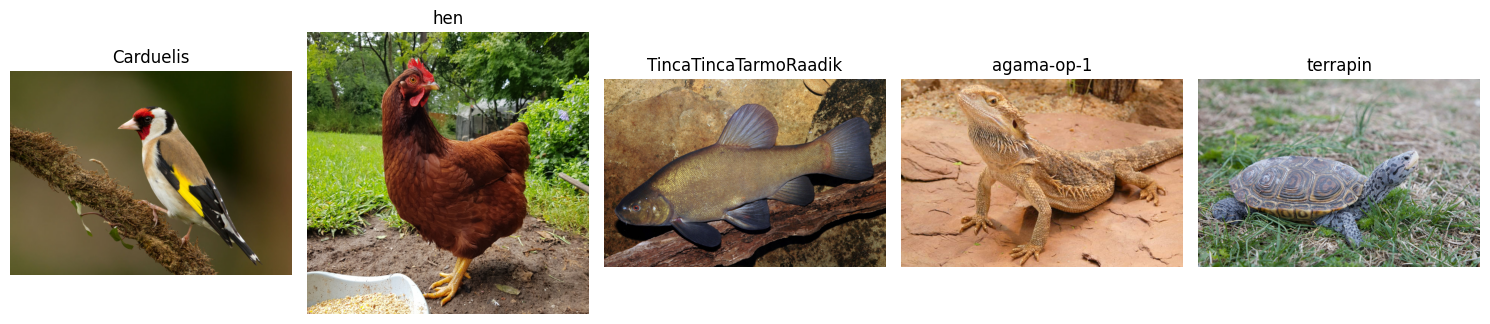

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import cv2

# Получаем список всех файлов с расширением .jpg в текущей директории
jpg_files = list(Path('.').glob('*.jpg'))

# Создаём фигуру для отображения изображений
fig, axes = plt.subplots(1, len(jpg_files), figsize=(15, 5))

# Если файлов больше одного, отображаем их в ряд
if len(jpg_files) > 1:
    for ax, file in zip(axes, jpg_files):
        img = cv2.imread(str(file))  # Читаем изображение с помощью OpenCV
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Конвертируем BGR в RGB для корректного отображения
        ax.imshow(img)  # Отображаем изображение
        ax.set_title(file.stem)  # Устанавливаем заголовок (имя файла без расширения)
        ax.axis('off')  # Убираем оси
else:
    # Если файл только один
    img = cv2.imread(str(jpg_files[0]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(jpg_files[0].stem)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Задание 2. Использование обученной модели для работы со своим датасетом

### 2.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [ ]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')


### 2.2. Подготовка тренировочных данных. Разделение на обучающую и тестовую выборку

In [ ]:
import kagglehub
import tensorflow as tf
from tensorflow.keras import layers, models

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

# Параметры загрузки данных и модели
batch_size = 32
img_height = 180  # Уменьшаем размер, чтобы снизить нагрузку
img_width = 180
num_classes = 10

dataset_path = "/root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img"

# Загрузка данных
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    validation_split=0.2,
    subset="training",
    seed=123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    validation_split=0.2,
    subset="validation",
    seed=123
)

100%|██████████| 586M/586M [00:27<00:00, 22.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2
Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


### 2.3. Обучение своей модели на основе предобученной модели "*название модели, выбранной в п.2.1.*"

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
# Добавляем предобученную модель ResNet50
base_model = tf.keras.applications.ResNet50(include_top=False, # убираем полносвязные слои
                   input_shape=(180,180,3), # меняем параметры входных данных на свои
                   pooling='avg', # значение параметра означает, что после последнего сверточного слоя будет применена операция среднего пулинга
                   weights='imagenet') # указываем используемые веса (путь к файлу с предобученными весами)

base_model.summary()
# base_model.get_config()

# Вариант №1
base_model.trainable = False # замораживаем все слои базовой модели

my_model = Sequential()
my_model.add(base_model)
my_model.add(Flatten())
my_model.add(Dense(512, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Dense(10, activation='softmax'))

my_model.get_config()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 180, 180, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 186, 186, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 90, 90, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 90, 90, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 90, 90, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 92, 92, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 45, 45, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 45, 45, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 45, 45, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 45, 45, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 45, 45, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 45, 45, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 45, 45, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 45, 45, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 45, 45, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

{'name': 'sequential',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 180, 180, 3),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_3'},
   'registered_name': None},
  {'module': 'keras.src.models.functional',
   'class_name': 'Functional',
   'config': {'name': 'resnet50',
    'trainable': False,
    'layers': [{'module': 'keras.layers',
      'class_name': 'InputLayer',
      'config': {'batch_shape': (None, 180, 180, 3),
       'dtype': 'float32',
       'sparse': False,
       'name': 'input_layer_2'},
      'registered_name': None,
      'name': 'input_layer_2',
      'inbound_nodes': []},
     {'module': 'keras.layers',
      'class_name': 'ZeroPadding2D',
      'config': {'name': 'conv1_pad',
       'trainable': False,
       'dtype': {'module': 'keras',
     

In [ ]:
my_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

epochs=10
history = my_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 79s 99ms/step - accuracy: 0.7907 - loss: 0.6952 - val_accuracy: 0.9150 - val_loss: 0.2587
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 49s 75ms/step - accuracy: 0.8899 - loss: 0.3306 - val_accuracy: 0.9223 - val_loss: 0.2365
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 49s 74ms/step - accuracy: 0.9107 - loss: 0.2829 - val_accuracy: 0.9240 - val_loss: 0.2312
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 84s 77ms/step - accuracy: 0.9120 - loss: 0.2646 - val_accuracy: 0.9182 - val_loss: 0.2498
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - accuracy: 0.9229 - loss: 0.2352 - val_accuracy: 0.9301 - val_loss: 0.2306
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 50s 77ms/step - accuracy: 0.9276 - loss: 0.2171 - val_accuracy: 0.9272 - val_loss: 0.2256
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.9285 - loss: 0.2138 - val_accuracy: 0.9295 - val_loss: 0.2223
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.9370 - loss: 0.1885 - 

### 2.4. Визуализация процесса обучения модели

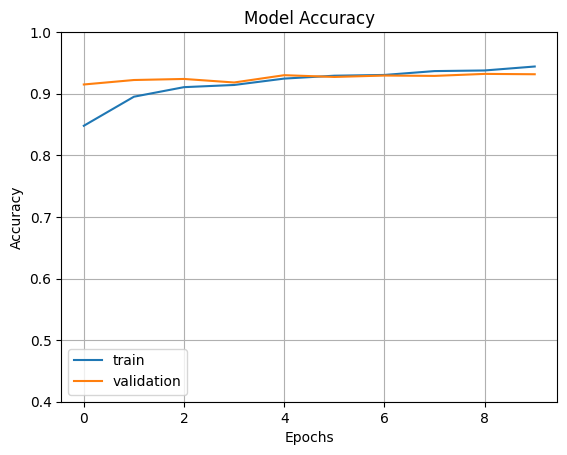

In [ ]:

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

### 2.5. Подготовьте набор проверочных данных (examples)

In [ ]:
# Ваш код

### 2.6. Реализуйте графический интерфейс для взаимодействия с обученной моделью, используя [Gradio](https://www.gradio.app/guides/image-classification-in-tensorflow). В качестве примеров (параметр examples в Gradio), используйте изображения из списка images (п.1.2.)

In [ ]:
# Ваш код

# Задание 3. Классификация набора пространственных данных EuroSat (для магистров)

- Ссылка на датасет: https://github.com/phelber/eurosat

- Описание на kaggle: https://www.kaggle.com/datasets/apollo2506/eurosat-dataset

В этом задании Вам будет предоставлен набор данных EuroSat, который содержит снимки земной поверхности, снятые спутником Sentinel-2. Вам нужно будет обучить модель для классификации этих изображений на 10 классов, представляющих различные типы земного покрова.

### **3.1. Загрузка данных:**
  * [Скачайте](https://madm.dfki.de/files/sentinel/EuroSAT.zip) набор данных EuroSat
  * Разделите данные на обучающую, валидационную и тестовую выборки.



In [ ]:
!unzip EuroSAT.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: 2750/SeaLake/SeaLake_2206.jpg  
  inflating: 2750/SeaLake/SeaLake_1313.jpg  
  inflating: 2750/SeaLake/SeaLake_263.jpg  
  inflating: 2750/SeaLake/SeaLake_967.jpg  
  inflating: 2750/SeaLake/SeaLake_515.jpg  
  inflating: 2750/SeaLake/SeaLake_1465.jpg  
  inflating: 2750/SeaLake/SeaLake_1817.jpg  
  inflating: 2750/SeaLake/SeaLake_2902.jpg  
  inflating: 2750/SeaLake/SeaLake_2570.jpg  
  inflating: 2750/SeaLake/SeaLake_1004.jpg  
  inflating: 2750/SeaLake/SeaLake_174.jpg  
  inflating: 2750/SeaLake/SeaLake_2111.jpg  
  inflating: 2750/SeaLake/SeaLake_2388.jpg  
  inflating: 2750/SeaLake/SeaLake_1948.jpg  
  inflating: 2750/SeaLake/SeaLake_838.jpg  
  inflating: 2750/SeaLake/SeaLake_2738.jpg  
  inflating: 2750/SeaLake/SeaLake_1999.jpg  
  inflating: 2750/SeaLake/SeaLake_2359.jpg  
  inflating: 2750/SeaLake/SeaLake_2660.jpg  
  inflating: 2750/SeaLake/SeaLake_1775.jpg  
  inflating: 2750/SeaLake/SeaLake_605

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


# Параметры загрузки данных и модели
batch_size = 32
img_height = 128  # Уменьшаем размер, чтобы снизить нагрузку
img_width = 128
num_classes = 10

dataset_path = "2750"

# Загрузка данных
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    validation_split=0.2,
    subset="training",
    seed=123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    validation_split=0.2,
    subset="validation",
    seed=123
)

Found 27000 files belonging to 10 classes.
Using 21600 files for training.
Found 27000 files belonging to 10 classes.
Using 5400 files for validation.


### **3.2. Выбор архитектуры нейронной сети:**
  * Выберите архитектуру нейронной сети, основанную на трансферном обучении, например, ResNet50, VGG16 или InceptionV3 ([полный список](https://keras.io/api/applications/)).
  * Загрузите предобученную модель выбранной архитектуры.


In [ ]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
# Добавляем предобученную модель ResNet50
base_model = tf.keras.applications.ResNet50(include_top=False, # убираем полносвязные слои
                   input_shape=(128,128,3), # меняем параметры входных данных на свои
                   weights='imagenet') # указываем используемые веса (путь к файлу с предобученными весами)

# Вариант №1
base_model.trainable = False # замораживаем все слои базовой модели

my_model = Sequential()
my_model.add(base_model)
my_model.add(Flatten())
my_model.add(Dense(16, activation='relu'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.5))
my_model.add(Dense(10, activation='softmax'))

# my_model.get_config()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
import tensorflow as tf
import keras
from keras.applications.inception_v3 import InceptionV3
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
# Добавляем предобученную модель ResNet50
base_model_2 = tf.keras.applications.InceptionV3(include_top=False, # убираем полносвязные слои
                   input_shape=(128,128,3), # меняем параметры входных данных на свои
                   weights='imagenet') # указываем используемые веса (путь к файлу с предобученными весами)

# Вариант №1
base_model_2.trainable = False # замораживаем все слои базовой модели

my_model_2 = Sequential()
my_model_2.add(base_model_2)
my_model_2.add(Flatten())
my_model_2.add(Dense(16, activation='relu'))
my_model_2.add(BatchNormalization())
my_model_2.add(Dropout(0.5))
my_model_2.add(Dense(10, activation='softmax'))

# my_model_2.get_config()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
import tensorflow as tf
import keras
from keras.applications.vgg16 import VGG16
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
# Добавляем предобученную модель ResNet50
base_model_3 = tf.keras.applications.VGG16(include_top=False, # убираем полносвязные слои
                   input_shape=(128,128,3), # меняем параметры входных данных на свои
                   weights='imagenet') # указываем используемые веса (путь к файлу с предобученными весами)

# Вариант №1
base_model_3.trainable = False # замораживаем все слои базовой модели

my_model_3 = Sequential()
my_model_3.add(base_model_3)
my_model_3.add(Flatten())
my_model_3.add(Dense(16, activation='relu'))
my_model_3.add(BatchNormalization())
my_model_3.add(Dropout(0.5))
my_model_3.add(Dense(10, activation='softmax'))

# my_model_2.get_config()

### **3.3. Дообучение модели:**
  * Добавьте к предобученной модели несколько слоев для классификации изображений EuroSat.
  * Обучите модель на обучающей выборке.

In [ ]:
from keras.applications.resnet50 import preprocess_input
from keras.optimizers import Adam

# Define a function to preprocess each batch
def preprocess_batch(images, labels):
    return preprocess_input(images), labels

# Apply the preprocessing function to the dataset
train_ds_resnet = train_ds.map(preprocess_batch)

val_ds_resnet = val_ds.map(preprocess_batch)

In [ ]:

# Compile your model
my_model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
history = my_model.fit(train_ds_resnet, validation_data=val_ds_resnet, epochs=epochs)

Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 49s 53ms/step - accuracy: 0.6196 - loss: 1.2584 - val_accuracy: 0.9231 - val_loss: 0.3980
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.8478 - loss: 0.6191 - val_accuracy: 0.9333 - val_loss: 0.3165
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.8798 - loss: 0.4983 - val_accuracy: 0.9383 - val_loss: 0.2662
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.9088 - loss: 0.4023 - val_accuracy: 0.9444 - val_loss: 0.2282
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9217 - loss: 0.3392 - val_accuracy: 0.9435 - val_loss: 0.2157
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.9368 - loss: 0.2833 - val_accuracy: 0.9448 - val_loss: 0.2000
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 33s 49ms/step - accuracy: 0.9460 - loss: 0.2475 - val_accuracy: 0.9483 - val_loss: 0.1839
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.9496 - loss: 0.2214 - 

In [ ]:
from keras.applications.inception_v3 import preprocess_input
from keras.optimizers import Adam

# Define a function to preprocess each batch
def preprocess_batch(images, labels):
    return preprocess_input(images), labels

# Apply the preprocessing function to the dataset
train_ds_inception = train_ds.map(preprocess_batch)

val_ds_inception = val_ds.map(preprocess_batch)

In [ ]:
my_model_2.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

epochs=10
history = my_model_2.fit(
  train_ds_inception,
  validation_data=val_ds_inception,
  epochs=epochs
)

Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 55s 58ms/step - accuracy: 0.3981 - loss: 1.7796 - val_accuracy: 0.7570 - val_loss: 0.9902
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.6175 - loss: 1.2048 - val_accuracy: 0.8076 - val_loss: 0.8358
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.6735 - loss: 1.0616 - val_accuracy: 0.8276 - val_loss: 0.7084
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.7083 - loss: 0.9496 - val_accuracy: 0.8426 - val_loss: 0.6313
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.7288 - loss: 0.8706 - val_accuracy: 0.8467 - val_loss: 0.5909
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.7553 - loss: 0.8076 - val_accuracy: 0.8513 - val_loss: 0.5533
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.7647 - loss: 0.7689 - val_accuracy: 0.8585 - val_loss: 0.5197
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.7756 - loss: 0.7253 - 

In [ ]:
from keras.applications.vgg16 import preprocess_input
from keras.optimizers import Adam

# Define a function to preprocess each batch
def preprocess_batch(images, labels):
    return preprocess_input(images), labels

# Apply the preprocessing function to the dataset
train_ds_vgg = train_ds.map(preprocess_batch)

val_ds_vgg = val_ds.map(preprocess_batch)

In [ ]:
my_model_3.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

epochs=10
history = my_model_3.fit(
  train_ds_vgg,
  validation_data=val_ds_vgg,
  epochs=epochs
)

Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 67s 84ms/step - accuracy: 0.4610 - loss: 1.7091 - val_accuracy: 0.8693 - val_loss: 0.5923
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 69s 76ms/step - accuracy: 0.7496 - loss: 0.8317 - val_accuracy: 0.9031 - val_loss: 0.4554
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 51s 76ms/step - accuracy: 0.8096 - loss: 0.6887 - val_accuracy: 0.9172 - val_loss: 0.3842
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.8363 - loss: 0.5976 - val_accuracy: 0.9226 - val_loss: 0.3351
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 51s 75ms/step - accuracy: 0.8605 - loss: 0.5246 - val_accuracy: 0.9243 - val_loss: 0.3003
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 51s 76ms/step - accuracy: 0.8738 - loss: 0.4662 - val_accuracy: 0.9291 - val_loss: 0.2759
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.8880 - loss: 0.4216 - val_accuracy: 0.9293 - val_loss: 0.2587
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.8925 - loss: 0.3832 - 



### **3.4. Оценка модели:**
  * Оцените производительность модели на валидационной и тестовой выборках.
  * Сравните результаты с другими архитектурами нейронных сетей.



In [ ]:
# Ваш код

### **3.5. Анализ результатов:**
  * Проанализируйте влияние различных параметров на производительность модели, таких как:
      * Количество эпох обучения
      * Размер пакета
      * Функция активации
      * Оптимизатор
      * Регуляризация

-----------------------------------------
**Ваш вывод**
-----------------------------------------
